In [133]:
import requests
import pytesseract
from bs4 import BeautifulSoup
from PIL import Image

In [182]:
cookies = dict(ASPSESSIONIDSQSASBBQ='DHKHDIGDMOBCBDPIIDPIITWX')

In [183]:
url = 'http://www.anp.gov.br/preco/prc/Resumo_Quatro_Index.asp'
html = requests.get(url, cookies=cookies)
soup = BeautifulSoup(html.content, 'html.parser')

In [184]:
images = soup.find_all('img')
for image in images:
    print(image['src'])

/preco/imgs/bkg-logo-anp.gif
/preco/imgs/logo_slp.png
./imagem.asp


In [209]:
captcha_url = "http://www.anp.gov.br/preco/prc/imagem.asp"

r = requests.get(captcha_url, stream=True, cookies=cookies)

with open('captcha.gif', 'wb') as f:
    for chunk in r:
        f.write(chunk)

In [210]:
img = Image.open('captcha.gif')

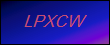

In [211]:
img

In [212]:
pytesseract.image_to_string(img)

'LPXCW'